# 데이터 전처리

전처리에 따라서 데이터 분석의 질이 달라지기 때문입니다. 전처리가 충분히 되어있지 않거나 잘못된 데이터를 사용한 경우 분석 결과의 신뢰도가 떨어지고, 예측 모델의 정확도도 떨어질 것입니다. 전처리가 잘 되어 있는 경우 데이터 분석의 질이 높아지고 예측 모델의 성능을 높일 수 있습니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

local_dir = os.getcwd()
csv_file_path = os.path.join(local_dir, 'data', 'trade.csv')
trade = pd.read_csv(csv_file_path) 
trade.head()


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


## 결측치 처리

1. 결측치가 있는 데이터 제거  
2. 결측치를 어떤 값을 대체
        결측치를 대체하는 방법은 다양하며, 데이터의 특성을 반영하여 해결

In [7]:
len(trade)

199

### 결측치 확인(1)

In [4]:
len(trade) - trade.count()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

### 결측치 확인(2)

In [5]:
trade.isnull().sum()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

### 결측치 처리(1) - 컬럼 제거

In [6]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


### 결측치 처리(2) - 행 제거

In [8]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [12]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [10]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [13]:
# subset 선택항 컬럼들중 how = all 전부 결측치 라면 , how = any 하나라도 결측치라면 드롭시킨다.
# inplace DataFrame 바로 적용시킬지 여부
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


### 결측치 보안방법
    1. 특정 값을 지정해 줄 수 있습니다. 그러나 결측치가 많은 경우, 모두 같은 값으로 대체한다면 데이터의 분산이 실제보다 작아지는 문제가 생길 수 있습니다.
    2. 평균, 중앙값 등으로 대체할 수 있습니다. 1번에서 특정 값으로 대체했을 때와 마찬가지로 결측치가 많은 경우 데이터의 분산이 실제보다 작아지는 문제가 발생할 수 있습니다.
    3. 다른 데이터를 이용해 예측값으로 대체할 수 있습니다. 예를 들어 머신러닝 모델로 2020년 4월 미국의 예측값을 만들고, 이 값으로 결측치를 보완할 수 있습니다.
    4. 시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다. 예를 들어 기온을 측정하는 센서 데이터에서 결측치가 발생할 경우, 전후 데이터의 평균으로 보완할 수 있습니다.

In [15]:
trade.loc[191]

기간      2020년 04월
국가명            미국
수출건수     105360.0
수출금액          NaN
수입건수    1141118.0
수입금액    5038739.0
무역수지          NaN
Name: 191, dtype: object

In [16]:
trade.loc[191, '수출금액']

nan

In [17]:
(trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2

5946782.0

## 중복데이터 처리

In [18]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [19]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [20]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [ ]:
# drop_duplicates 중복 데이터 제거 inplace DataFrame에 바로 적용
# df.drop_duplicates(subset=['id'], keep='last')
trade.drop_duplicates(inplace=True)

## 이상치 처리

        이상치는 극단적으로 크거나 작은값
        Min-Max Scaling 해보면 대부분의 값은 0에 가깝고 이상치만 1에 가까운 값을 가지게 된다.

### z-score method
    z-score method 는 데이터의 평균을 빼고 표준편차로 나눈것이다.
    z-score가 특정 기준을 넘어서는 데이터를 이상치로 판단한다.
    현재값 - 데이터의 평균값 의 절대값
    abs(df[col] - np.mean(df[col]))
    표준편차로 나누기
    abs(df[col] - np.mean(df[col]))/np.std(df[col])
    z 값보다 큰 인덱스를 반환한다.
    df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
    

In [21]:
#이상치 값인 데이터만 추출하는 함수
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

# 이상치 값이 아닌 데이터만 추출하도록 하는 함수
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
190,2020년 04월,중국,194716.0,10164071.0,365746.0,9619835.0,544236.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


    z 값은 어떻게 정할지에 대해서 고민해보자.

### IQR method
    사분위법 - 데이터를 범위를 사등분 하여 이상치를 알아내는 방법

In [22]:
np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

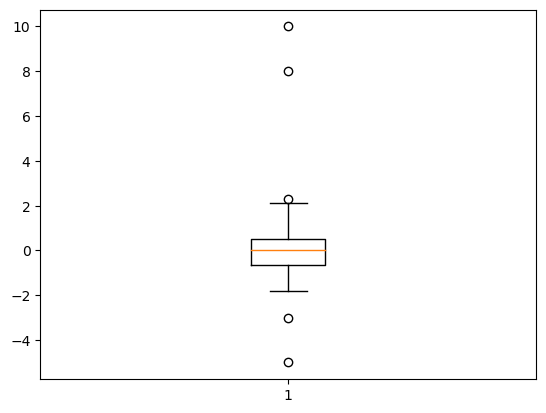

In [23]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

    IQR은 3사분위 수에서 1사분위 값을 뺀 값으로 데이터의 중간 50% 범위를 나타낸다.

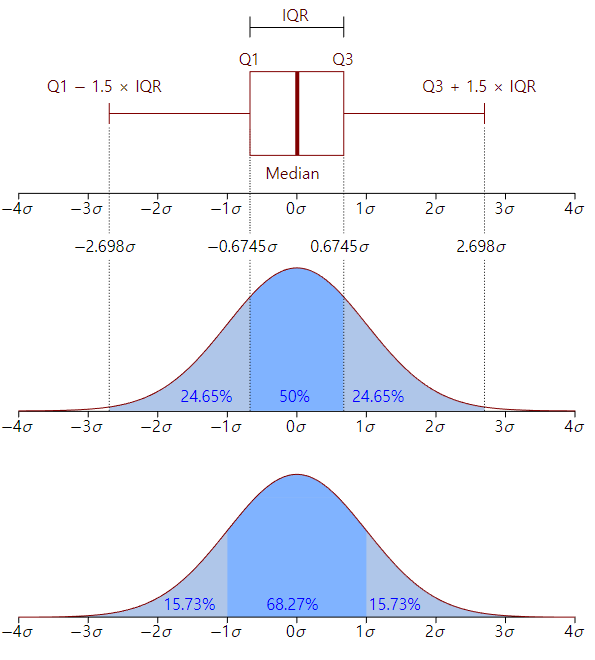


    z-score의 단점
    Robust하지 못하다. 왜나하면 평균과 표준편차 자체가 이상치의 존재에 크게 영향을 받기 때문이다.
    작은 데이터셋의 경우 z-score의 방법으로 이상치를 알아내기 어렵다. 특히 item이 12개 이하인 데이터셋에서는 불가능하다.

http://colingorrie.github.io/outlier-detection.html

## 정규화
    커럼마다 스케일이 크게 차이가 나는 데이터를 입력하면 머신러닝 모델 학습에 문제가 발생할 수 있다.
    Min-Max Scaling 방법을 이용하여 표준화(Standardization)를 한다.
    Standardization 데이터의 편균은 0, 분산은 1로 변환한다.
    피처가 가우시안 분포인 경우 유용하다.
    

### 정규화 예제

In [24]:
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


In [25]:
# 데이터 x를 Standardization 기법으로 정규화합니다. 
x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,0.559307,-0.314995
1,-1.132240,0.407499
2,-0.232338,0.608450
3,-0.156691,0.705884
4,0.549839,0.545945
...,...,...
95,0.275419,0.031252
96,-1.023639,-1.271014
97,-2.032961,1.663966
98,-1.121824,1.845290


In [26]:
# 데이터 x를 min-max scaling 기법으로 정규화합니다. 
x_min_max = (x-x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.607216,0.426240
1,0.267692,0.571821
2,0.448318,0.612312
3,0.463502,0.631944
4,0.605316,0.599717
...,...,...
95,0.550235,0.496008
96,0.289490,0.233606
97,0.086901,0.824995
98,0.269782,0.861531


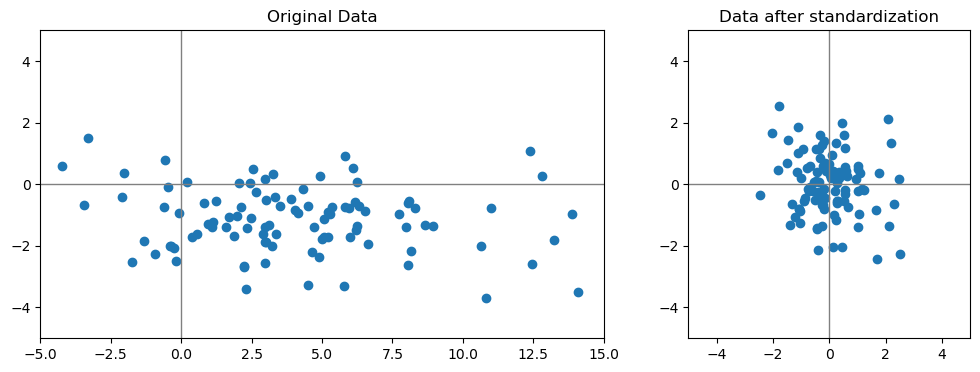

In [27]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

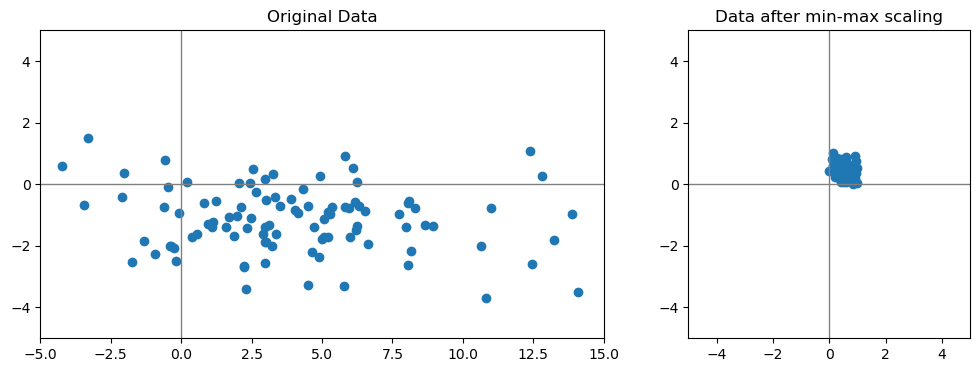

In [28]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

### trade데이터 정규화

In [29]:
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization= (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_Standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.016301,1.389072,-0.163573,1.269146,1.254295
1,-0.694577,-0.258272,0.414021,-0.968522,0.399240
2,-0.852320,-1.094329,-0.995248,-0.868388,-1.099277
3,-0.424298,0.844460,-0.577434,0.693463,0.830261
4,-0.769827,-0.394729,0.147118,-1.278970,0.436171


In [30]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.960000e+02,1.950000e+02,1.960000e+02,1.960000e+02,1.950000e+02
mean,-1.620019e-16,-6.262797e-17,7.590300e-17,5.890979e-17,5.010237e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.236100e-01,-1.234557e+00,-1.000554e+00,-1.278970e+00,-1.605143e+00
25%,-5.973449e-01,-1.044645e+00,-7.687917e-01,-7.950137e-01,-1.118259e+00
50%,-4.405756e-01,-1.621527e-01,-3.428718e-01,-4.141340e-01,1.670773e-01
75%,4.325167e-01,1.029076e+00,3.917528e-01,8.920129e-01,7.442358e-01
max,5.449186e+00,2.066733e+00,3.247782e+00,2.356507e+00,2.431787e+00


#### min-max scaling


In [ ]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
trade[cols] = (trade[cols]-trade[cols].min())/(trade[cols].max()-trade[cols].min())
trade.head()

In [31]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,196.000000,1.950000e+02,1.960000e+02,1.960000e+02,1.950000e+02
mean,118158.739796,6.584133e+06,3.840935e+05,5.580662e+06,1.000692e+06
std,75255.505060,3.959344e+06,3.030535e+05,2.019160e+06,2.343934e+06
min,48652.000000,1.696097e+06,8.087200e+04,2.998216e+06,-2.761657e+06
25%,73205.250000,2.448024e+06,1.511085e+05,3.975402e+06,-1.620432e+06
50%,85003.000000,5.942114e+06,2.801850e+05,4.744459e+06,1.392310e+06
75%,150708.000000,1.065860e+07,5.028155e+05,7.381778e+06,2.745131e+06
max,528240.000000,1.476704e+07,1.368345e+06,1.033882e+07,6.700639e+06


    주의!!
    train 데이터와 test 데이터가 나눠져 있는 경우 train 데이터를 정규화시켰던 기준 그대로 test 데이터도 정규화 시켜줘야 합니다.

## 원-핫인코딩
    원-핫 인코딩이란 카테고리별 이진 특성을 만들어 해당하는 특성만 1, 나머지는 0으로 만드는 방법

In [32]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [33]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


In [34]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


## 구간화(Binning)

In [35]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

<AxesSubplot:>

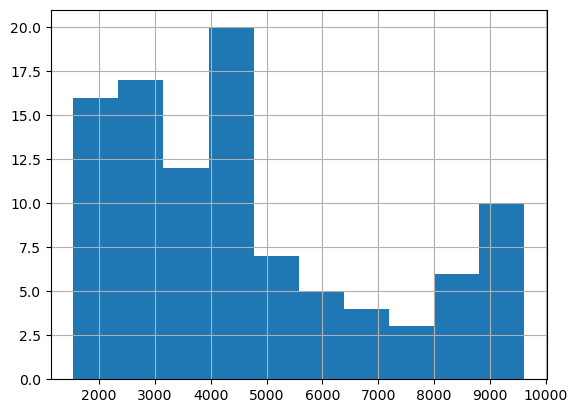

In [36]:
salary.hist()

In [37]:
bins = [0, 2000, 4000, 6000, 8000, 10000]


In [38]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [39]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [40]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [41]:
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [42]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

### qcut은 구간을 일정하게 나누는 것이 아니라 데이터의 분포를 비슷한 크기의 그룹으로 나눠줍니다.

In [43]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64, right]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [44]:
print(ctg.value_counts().sort_index())
print(".\n.\n🛸 Well done!")

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64
.
.
🛸 Well done!
